# Семинар №3/4
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13

# Задание

Набор данных mushrooms содержит в себе описание множества грибов по 22 атрибутам (особенности шляпки, запах, особенности пластинок, ножки, покрывала, среда обитания и др.).  
В рамках данного семинара вам будет необходимо построить модель, предсказывающую съедобность и ядовитость гриба по различным признакам.

### 0. Загрузка датасета

In [2]:
# Независимо от дальнейшего сценария - оно вам понадобится, не теряйте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Вариант 1. 
Если вы очень ленивы - это можно стянуть через специальную библиотечку. Код импорта в фреймы X и y заботливо представлен ниже.   
<i>Если не хотите пачкаться о сторонние либы - просто удалите эти блоки</i>

In [3]:
# pip install ucimlrepo

In [8]:
#from ucimlrepo import fetch_ucirepo 

# Загрузка датасета
#mushroom = fetch_ucirepo(id=73)

In [9]:
#mushroom.variables

## Описание классов на русском
0. class - съедобный или ядовитый.
1. cap-shape - вид шляпки
2. cap-surface - поверхность шляпки
3. cap-color - цвет шляпки-
4. bruises? - образуются ли на поверхности “синяки”
5. odor - запах
6. gill-attachment - прикрепление пластинок
7. gill-spacing - расстояние между пластинками
8. gill-size - размер пластинок
9. gill-color - цвет пластинок
10. stalk-shape - вид ножки
11. stalk-root - корень ножки, может отсутствовать
12. stalk-surface-above-ring - поверхность над кольцом
13. stalk-surface-below-ring - под кольцом
14. stalk-color-above-ring - цвет над кольцом
15. stalk-color-below-ring - под кольцом
16. veil-type - вид покрывала
17. veil-color - цвет покрывала
18. ring-number - число колец
19. ring-type - тип колец
20. spore-print-color - цвет спорового порошка
21. population - плотность расселения грибов
22. habitat - среда обитания

#### Вариант 2. Классический.
Тоже не забывайте удалить, если уже согласились на вариант 1.

In [4]:
file_path = './data/mushrooms.csv'

df = pd.read_csv(file_path)
# X, y - тут уже сами

df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6277,p,x,s,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
1126,e,f,s,w,f,n,f,w,b,p,...,s,w,w,p,w,o,e,k,a,g
255,e,b,y,w,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m
7913,e,b,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,o,v,l
1769,e,x,y,y,t,a,f,c,b,p,...,y,w,w,p,w,o,p,n,y,g
6190,p,x,y,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
4199,p,x,f,p,f,c,f,w,n,n,...,s,w,w,p,w,o,p,n,v,d
3418,p,x,s,g,f,c,f,c,n,p,...,s,w,w,p,w,o,p,n,s,d
4489,p,x,f,y,f,f,f,c,b,h,...,k,n,n,p,w,o,l,h,y,d
2682,e,f,f,n,t,n,f,c,b,u,...,s,p,g,p,w,o,p,k,v,d


### 1. Провести обзор датасета
- получение общей информации, размера датасета  
- проверка наличия пропущенных значений и дубликатов  
  <i>Подсказка: обратите внимание на описание датасета выше</i>

In [5]:
df.shape

(8124, 23)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [11]:
conclusion = '''
Просмотрела информацию о датасете, посмотрела на сам датасет, датасет чистый, выбросов не может быть по поределению, т.к. все значения строковые
Дубликатов нет, пропусков нет
Довольно просто будет обрабатывать этот датасет, всего два класса, в целом многообещающе
Достаточно сбалансированный по количеству строк на класс

Какие либо гипотезы или выводы делать сложно
'''

print(conclusion)


Просмотрела информацию о датасете, посмотрела на сам датасет, датасет чистый, выбросов не может быть по поределению, т.к. все значения строковые
Дубликатов нет, пропусков нет
Довольно просто будет обрабатывать этот датасет, всего два класса, в целом многообещающе
Достаточно сбалансированный по количеству строк на класс

Какие либо гипотезы или выводы делать сложно



### 2. Обработка данных
- удаление или заполнение пропущенных значений
- удаление дубликатов
- подготовка датасета к его передаче в модель  
 <i>Пункты выполнять при необходимости и в полной уверенности в своих действиях</i>

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

features_main = df.drop('class', axis=1)
target_main = df['class']

label_encoder = OrdinalEncoder()
features = label_encoder.fit_transform(features_main)
target = label_encoder.fit_transform(pd.DataFrame(target_main))

standard_scaler = StandardScaler()
standard_scaler.fit(features)
features = standard_scaler.transform(features)

target = target.ravel()

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=50)

thought = '''
Почитала немного в интернете про кодировщики и модели, узнала, что для линейных моделей лучше подходит onehot, так что буду пробовать его
Единственное что меня смущает это итоговое колличество атрибутов, звучит страшно, но попробовать стоит

Текущий результат в 3 задании:
accuracy_logreg: 0.9686153846153847 
precision_logreg: 0.9695493300852619 
recall_logreg: 0.9683698296836983
'''

print(thought)

onehot_encoder = OneHotEncoder()
features_lr = onehot_encoder.fit_transform(features_main).toarray()
column_names = onehot_encoder.get_feature_names_out()
#pd.DataFrame(encoded_data, columns=column_names).head()

features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr, target, test_size=0.2, random_state=50)


Почитала немного в интернете про кодировщики и модели, узнала, что для линейных моделей лучше подходит onehot, так что буду пробовать его
Единственное что меня смущает это итоговое колличество атрибутов, звучит страшно, но попробовать стоит

Текущий результат в 3 задании:
accuracy_logreg: 0.9686153846153847 
precision_logreg: 0.9695493300852619 
recall_logreg: 0.9683698296836983



### 3. Построение моделей
- построить модель логистической регрессии
- построить дерево решений
- сравнить полученные результаты  
- на основе дерева решений показать класс/классы, оказывающие наибольшее влияние на модель. Объясните возникшие закономерности.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_squared_error

import matplotlib.pyplot as plt

logreg_model = LogisticRegression(max_iter=5000)

parameters = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': [None, 'l2'],
    'class_weight': [None, 'balanced']
}

logreg_model_grid = GridSearchCV(logreg_model, parameters, cv=5, scoring='accuracy')

logreg_model_grid.fit(features_train_lr, target_train_lr)

logreg_pred_train = logreg_model_grid.predict(features_train_lr)
logreg_pred_test = logreg_model_grid.predict(features_test_lr)

In [15]:
# Аналитика полученных результатов
confusion_matrix_logreg_test = confusion_matrix(target_test, logreg_pred_test)

accuracy_logreg_train = accuracy_score(target_train, logreg_pred_train)
accuracy_logreg_test = accuracy_score(target_test, logreg_pred_test)

precision_logreg_train = precision_score(target_train, logreg_pred_train)
precision_logreg_test = precision_score(target_test, logreg_pred_test)

recall_logreg_train = recall_score(target_train, logreg_pred_train)
recall_logreg_test = recall_score(target_test, logreg_pred_test)

classification_report_logreg_test = classification_report(target_test, logreg_pred_test)

print("confusion_matrix_test:")
print(confusion_matrix_logreg_test, '\n')

print("accuracy_logreg_train:", accuracy_logreg_train)
print("accuracy_logreg_test:", accuracy_logreg_test, '\n')

print("precision_logreg_train:", precision_logreg_train)
print("precision_logreg_test:", precision_logreg_test, '\n')

print("recall_logreg_train:", recall_logreg_train)
print("recall_logreg_test:", recall_logreg_test, '\n\n\n')
print(classification_report_logreg_test, '\n\n\n')

conclusion = '''
Не ожидала, было инетересно, получается не зря попробовала точность поднялась до 1
Получается не зря изменила на onehot, правда выполняться стало куда дольше
'''

print(conclusion)

confusion_matrix_test:
[[803   0]
 [  0 822]] 

accuracy_logreg_train: 1.0
accuracy_logreg_test: 1.0 

precision_logreg_train: 1.0
precision_logreg_test: 1.0 

recall_logreg_train: 1.0
recall_logreg_test: 1.0 



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       803
         1.0       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 




Не ожидала, было инетересно, получается не зря попробовала точность поднялась до 1
Получается не зря изменила на onehot, правда выполняться стало куда дольше



In [26]:
DTC_model = DecisionTreeClassifier()

param_grid_tree = {
    'max_depth': [100, 200, 300],
    'min_samples_split': [100, 150, 200],
    'min_samples_leaf': [10, 20, 300]
}

DTC_model_grid = GridSearchCV(DTC_model, param_grid_tree, cv=5, scoring='accuracy')

DTC_model_grid.fit(features_train, target_train)

DTC_pred_train = DTC_model_grid.predict(features_train)
DTC_pred_test = DTC_model_grid.predict(features_test)

In [27]:
# Аналитика полученных результатов
confusion_matrix_DTC_test = confusion_matrix(target_test, DTC_pred_test)

accuracy_DTC_train = accuracy_score(target_train, DTC_pred_train)
accuracy_DTC_test = accuracy_score(target_test, DTC_pred_test)

precision_DTC_train = precision_score(target_train, DTC_pred_train)
precision_DTC_test = precision_score(target_test, DTC_pred_test)

recall_DTC_train = recall_score(target_train, DTC_pred_train)
recall_DTC_test = recall_score(target_test, DTC_pred_test)

classification_report_DTC_test = classification_report(target_test, DTC_pred_test)

print("confusion_matrix_test:")
print(confusion_matrix_DTC_test, '\n')

print("accuracy_logreg_train:", accuracy_DTC_train)
print("accuracy_logreg_test:", accuracy_DTC_test, '\n')

print("precision_logreg_train:", precision_DTC_train)
print("precision_logreg_test:", precision_DTC_test, '\n')

print("recall_logreg_train:", recall_DTC_train)
print("recall_logreg_test:", recall_DTC_test, '\n\n\n')
print(classification_report_DTC_test, '\n\n\n')

confusion_matrix_test:
[[801   2]
 [  3 819]] 

accuracy_logreg_train: 0.9976919526080935
accuracy_logreg_test: 0.9969230769230769 

precision_logreg_train: 0.9967731526298806
precision_logreg_test: 0.997563946406821 

recall_logreg_train: 0.9983839689722043
recall_logreg_test: 0.9963503649635036 



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       803
         1.0       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 





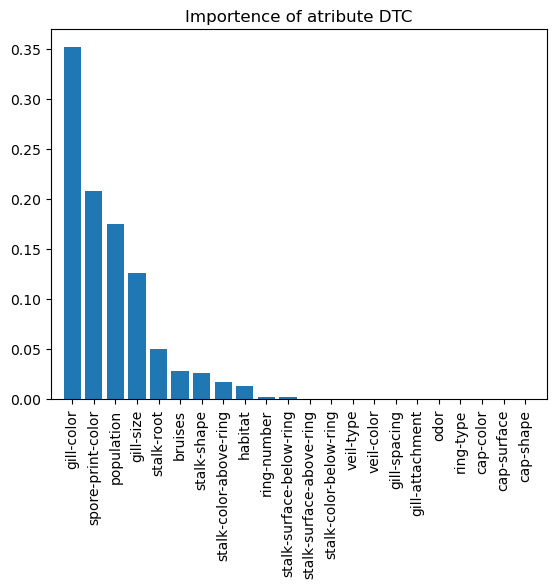

In [28]:
# График с изображением зависимостей
importances = DTC_model_grid.best_estimator_.feature_importances_
importances_indexes_ascending = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importence of atribute DTC")
plt.bar(range(features_main.shape[1]), importances[importances_indexes_ascending])
plt.xticks(range(features_main.shape[1]), features_main.columns[importances_indexes_ascending], rotation=90)
plt.xlim([-1, features_main.shape[1]])
plt.show()

In [29]:
df.describe().loc['unique', :]

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
Name: unique, dtype: object

Index: 8: gill-color, Importence: 0.35162498309010076, Count of unique: 12
Index: 19: spore-print-color, Importence: 0.20789659444833736, Count of unique: 9
Index: 20: population, Importence: 0.17492598111564509, Count of unique: 6
Index: 7: gill-size, Importence: 0.1259066046608169, Count of unique: 2
Index: 10: stalk-root, Importence: 0.05033389246852671, Count of unique: 5
Index: 3: bruises, Importence: 0.02836938501480611, Count of unique: 2
Index: 9: stalk-shape, Importence: 0.02613581701768727, Count of unique: 2
Index: 13: stalk-color-above-ring, Importence: 0.016750158194075476, Count of unique: 9
Index: 21: habitat, Importence: 0.013498973380874581, Count of unique: 7
Index: 17: ring-number, Importence: 0.002444450642444562, Count of unique: 3
Index: 12: stalk-surface-below-ring, Importence: 0.0021131599666852022, Count of unique: 4
Index: 11: stalk-surface-above-ring, Importence: 0.0, Count of unique: 4
Index: 14: stalk-color-below-ring, Importence: 0.0, Count of unique: 9
In

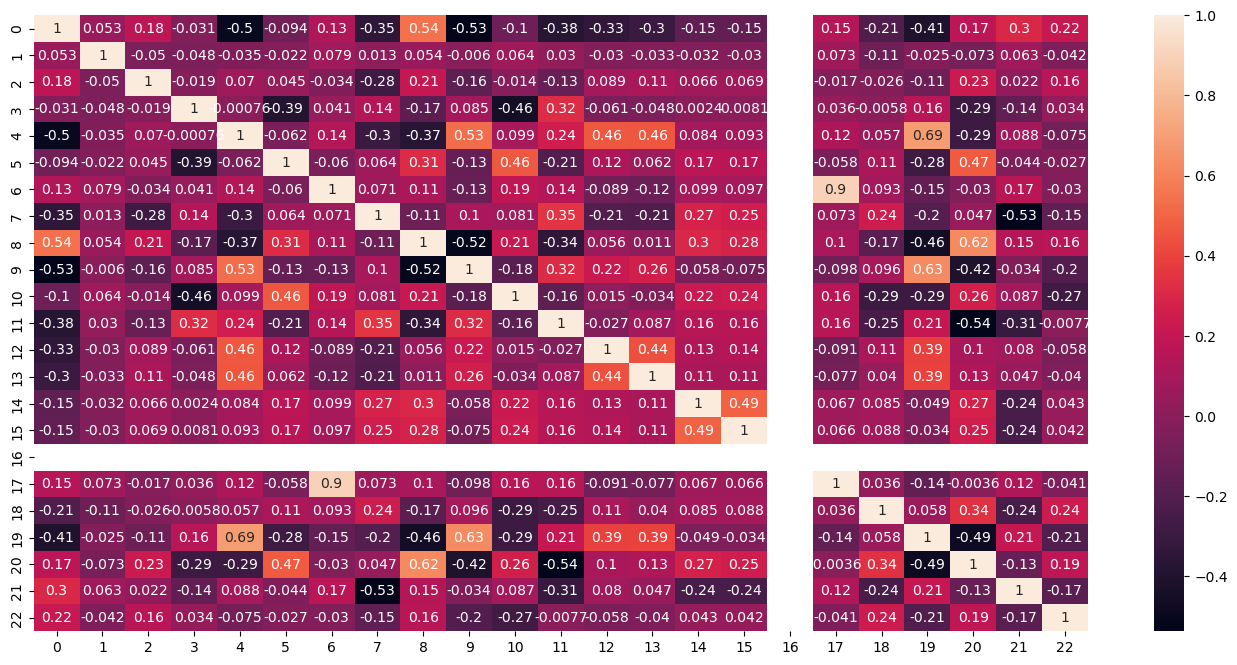

Atributes that are important:
3: bruises 0.02836938501480611
7: gill-size 0.1259066046608169
8: gill-color 0.35162498309010076
9: stalk-shape 0.02613581701768727
10: stalk-root 0.05033389246852671
12: stalk-surface-below-ring 0.0021131599666852022
13: stalk-color-above-ring 0.016750158194075476
17: ring-number 0.002444450642444562
19: spore-print-color 0.20789659444833736
20: population 0.17492598111564509
21: habitat 0.013498973380874581

Atributes that are not important (importance = 0):
0: cap-shape
1: cap-surface
2: cap-color
4: odor
5: gill-attachment
6: gill-spacing
11: stalk-surface-above-ring
14: stalk-color-below-ring
15: veil-type
16: veil-color
18: ring-type



In [37]:
import seaborn as sns

label_encoder = OrdinalEncoder()
df_for_plot = label_encoder.fit_transform(df)

df_for_plot = pd.DataFrame(df_for_plot)

for index in importances_indexes_ascending:
    print(f"Index: {index}: {features_main.columns[index]}, Importence: {importances[index]}, Count of unique: {features_main[features_main.columns[index]].unique().size}")

print('\n\n')
len_of_columns = len(features_main.columns)
text = ''
for index in range(len_of_columns):
    text += f"{index}: {features_main.columns[index]} {'+' if importances[index] > 0 else '-'}, "
    if index % 3 == 0 and index != 0:
       text += '\n\n' 
print(text)

plt.figure(figsize=(17, 8))
ax = sns.heatmap(data=df_for_plot.corr(), annot=True)
plt.show()

text = ''
for index in range(len_of_columns):
    if importances[index] > 0:
        text += f"{index}: {features_main.columns[index]} {importances[index]}\n"
print('Atributes that are important:\n' + text)

text = ''
for index in range(len_of_columns):
    if importances[index] <= 0:
        text += f"{index}: {features_main.columns[index]}\n"
print('Atributes that are not important (importance = 0):\n' + text)

In [16]:
conclusion = '''
Пыталась найти закономерность, очень слабо прослеживается
Выдвинутые гипотезы:
1. Те атрибуты, у которых индекс столбцы ниже более важные (- просто бредовое предположение)
2. Те атрибуты, у которых количество уникальных элементов наибольшее - более важные (- 7 атрибут имеет меньше unique, чем 10, а 2 атрибут в конце по важности)
3. Первый атрибут взялся по количеству уникальных значений, остальные по наименьшей кореляции (- корреляция между 8 и 20 атрибутами достаточно сильная)

Не получилось найти закономерность, гипотезы новые в голову тоже не пришли :(

Но всё таки я склоняюсь к тому, что первый элемент, то есть самый значимый, проходит по 2 пункту, с наибольшим количеством unique
'''

print(conclusion)


Пыталась найти закономерность, очень слабо прослеживается
Выдвинутые гипотезы:
1. Те атрибуты, у которых индекс столбцы ниже более важные (- просто бредовое предположение)
2. Те атрибуты, у которых количество уникальных элементов наибольшее - более важные (- 7 атрибут имеет меньше unique, чем 10, а 2 атрибут в конце по важности)
3. Первый атрибут взялся по количеству уникальных значений, остальные по наименьшей кореляции (- корреляция между 8 и 20 атрибутами достаточно сильная)

Не получилось найти закономерность, гипотезы новые в голову тоже не пришли :(

Но всё таки я склоняюсь к тому, что первый элемент, то есть самый значимый, проходит по 2 пункту, с наибольшим количеством unique



### 4. Ломай ломай мы же миллионеры ещё купим
- Скорее всего, у вас получились очень подозрительно хорошие результаты. Доведите свою модель <s>до истерики</s> до точности менее 0.9 на двух моделях одновременно, путём удаления наиболее влиятельных признаков.  
<i>P.S. Пожалуйста, сделайте что-то автоматическое, не нужно перебирать руками до победного.</i>  
<i>P.S.S. Не исключено, что в самый ответственный момент вас посетит некоторый Warning!!. Пожалуйста, обработайте его, согласно сути его ругательств.</i>

In [42]:
def train_DTC(features_train_1, target_train_1):
    """RETURN: model"""

    DTC_model = DecisionTreeClassifier()

    param_grid_tree = {
        'max_depth': [100, 200, 300],
        'min_samples_split': [100, 150, 200],
        'min_samples_leaf': [10, 20, 300]
    }
    
    DTC_model_grid = GridSearchCV(DTC_model, param_grid_tree, cv=5, scoring='accuracy')
    
    DTC_model_grid.fit(features_train_1, target_train_1)
    
    return DTC_model_grid

def train_lr(features_train_lr_1, target_train_lr_1):
    """RETURN: model"""

    logreg_model = LogisticRegression(solver='newton-cg', max_iter=100) # max_iter=5000
    '''
    parameters = {
        'solver': ['newton-cg', 'lbfgs'],
        'class_weight': [None, 'balanced']
    }
    
    logreg_model_grid = GridSearchCV(logreg_model, parameters, cv=5, scoring='accuracy')
    
    logreg_model_grid.fit(features_train_lr, target_train_lr)
    '''
    logreg_model.fit(features_train_lr_1, target_train_lr_1)
    
    # return logreg_model_grid
    return logreg_model

def form_data_for_DTC(features_main_1, target_main_1):
    """RETURN: data for TRAIN and TEST DTC"""

    label_encoder = OrdinalEncoder()
    features = label_encoder.fit_transform(features_main_1)
    target = label_encoder.fit_transform(pd.DataFrame(target_main_1))
    
    standard_scaler = StandardScaler()
    standard_scaler.fit(features)
    features = standard_scaler.transform(features)
    
    target = target.ravel()
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=50)
    
    return features_train, features_test, target_train, target_test

def form_data_for_lr(features_main_1, target_main_1):
    """RETURN: data for TRAIN and TEST lr"""
    label_encoder = OrdinalEncoder()
    target = label_encoder.fit_transform(pd.DataFrame(target_main_1))

    target = target.ravel()
    
    onehot_encoder = OneHotEncoder()
    features_lr = onehot_encoder.fit_transform(features_main_1).toarray()
    column_names = onehot_encoder.get_feature_names_out()
    #pd.DataFrame(encoded_data, columns=column_names).head()
    
    features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr, target, test_size=0.2, random_state=50)
    
    return features_train_lr, features_test_lr, target_train_lr, target_test_lr

def decriment(x):
    return x-1

# v_decriment = np.vectorize(decriment)
# print(importances_indexes_ascending)

In [44]:
features_broke = df.drop('class', axis=1)
target_broke = df['class']

features_train, features_test, target_train, target_test = form_data_for_DTC(features_broke, target_broke)
features_train_lr, features_test_lr, target_train_lr, target_test_lr = form_data_for_lr(features_broke, target_broke)

model_DTC_bk = train_DTC(features_train, target_train)
model_lr_bk = train_lr(features_train_lr, target_train_lr)

stop_accuracy = 0.9

accuracy_DTC_bk_train = accuracy_score(target_train, model_DTC_bk.predict(features_train))
accuracy_DTC_bk = accuracy_score(target_test, model_DTC_bk.predict(features_test))

accuracy_lr_bk_train = accuracy_score(target_train_lr, model_lr_bk.predict(features_train_lr))
accuracy_lr_bk = accuracy_score(target_test_lr, model_lr_bk.predict(features_test_lr))

# importances = tree_model.feature_importances_
# importances_indexes_ascending = np.argsort(importances)[::-1]
while accuracy_DTC_bk >= stop_accuracy or accuracy_lr_bk >= stop_accuracy:
    if len(importances_indexes_ascending) == 0 or features_train.shape[1] == 1:
        print('All atributes has been deleted')
        break
    importances = model_DTC_bk.best_estimator_.feature_importances_
    importances_indexes_ascending = np.argsort(importances)[::-1]
    
    print('DTC:', accuracy_DTC_bk, 'lr:', accuracy_lr_bk, 'lr train:', accuracy_lr_bk_train)
    print(accuracy_DTC_bk >= stop_accuracy, accuracy_lr_bk >= stop_accuracy)
    
    index_of_feature = importances_indexes_ascending[0]
    print(index_of_feature)
    
    feature_name = features_broke.columns[index_of_feature]

    features_broke = features_broke.drop(features_broke.columns[index_of_feature], axis=1)
    print('features_broke:', features_broke.shape)

    features_train, features_test, target_train, target_test = form_data_for_DTC(features_broke, target_broke)
    features_train_lr, features_test_lr, target_train_lr, target_test_lr = form_data_for_lr(features_broke, target_broke)

    print(f"{index_of_feature}: {feature_name} was deleted, importeance: {importances[index_of_feature]}")

    model_DTC_bk = train_DTC(features_train, target_train)
    model_lr_bk = train_lr(features_train_lr, target_train_lr)

    accuracy_DTC_bk_train = accuracy_score(target_train, model_DTC_bk.predict(features_train))
    accuracy_DTC_bk = accuracy_score(target_test, model_DTC_bk.predict(features_test))

    accuracy_lr_bk_train = accuracy_score(target_train_lr, model_lr_bk.predict(features_train_lr))
    accuracy_lr_bk = accuracy_score(target_test_lr, model_lr_bk.predict(features_test_lr))

    print(len(importances))
    print('----------------------------------')

print(f"Accurancy DTC: {accuracy_DTC_bk}")
print(f"Accurancy lr: {accuracy_lr_bk}")
print(f"Count of atributes after deletion: {features_train.shape}")

DTC: 0.9969230769230769 lr: 1.0 lr train: 1.0
True True
8
features_broke: (8124, 21)
8: gill-color was deleted, importeance: 0.35162498309010076
22
----------------------------------
DTC: 0.9870769230769231 lr: 1.0 lr train: 1.0
True True
18
features_broke: (8124, 20)
18: spore-print-color was deleted, importeance: 0.5466420669007621
21
----------------------------------
DTC: 0.9809230769230769 lr: 1.0 lr train: 0.9996922603477458
True True
4
features_broke: (8124, 19)
4: odor was deleted, importeance: 0.4176590359484452
20
----------------------------------
DTC: 0.9821538461538462 lr: 0.9963076923076923 lr train: 0.99523003539006
True True
6
features_broke: (8124, 18)
6: gill-size was deleted, importeance: 0.3096083417632182
19
----------------------------------
DTC: 0.9969230769230769 lr: 0.9932307692307693 lr train: 0.991998769041391
True True
16
features_broke: (8124, 17)
16: population was deleted, importeance: 0.329348704319249
18
----------------------------------
DTC: 0.9950769

In [17]:
conclusion = '''
Я буквально сделала всё что смогла, и только когда начала писать конклюжон понял в чём дело... У меня же onehot....
В общем, коротко о том, что было выше, не падала accurancy, не понимала с чем связанно, очень долго возилась, потом поняла, что я удаляла столбцы, а у меня
их там не 22, а больше 100, поэтому accurancy и не падала, в общем исправила

Тут ещё не совсем поняла, нужно было поудалять элементы, которые изначально у нас важные, или те, которые переназначаются после нового обучения, в
общем, сделала по второму предположению

Варнинг был связан с типом solver, который по дефолту указан в логистической регресии, благо я до это использовала, так что пофиксить не составило труда
'''

print(conclusion)


Я буквально сделала всё что смогла, и только когда начала писать конклюжон понял в чём дело... У меня же onehot....
В общем, коротко о том, что было выше, не падала accurancy, не понимала с чем связанно, очень долго возилась, потом поняла, что я удаляла столбцы, а у меня
их там не 22, а больше 100, поэтому accurancy и не падала, в общем исправила

Тут ещё не совсем поняла, нужно было поудалять элементы, которые изначально у нас важные, или те, которые переназначаются после нового обучения, в
общем, сделала по второму предположению

Варнинг был связан с типом solver, который по дефолту указан в логистической регресии, благо я до это использовала, так что пофиксить не составило труда



### 5. Посещаем модель с ответным визитом
- Сконфигурируйте датафрейм из фичей таким образом, чтобы:
    1) В нём было как можно меньше атрибутов;  
    2) Точность на обоих моделях была выше чем 0.99;
    3) Объясните, почему так произошло, что на деле нам вовсе и не нужны все 22 атрибута (или нужны...).  
<i>Вполне возможно, что выводы из пункта 3 вам очень пригодятся.</i>

In [47]:
# importances
# importances_indexes_ascending
features_main = df.drop('class', axis=1)
target_main = df['class']

features_train, features_test, target_train, target_test = form_data_for_DTC(features_main, target_main)
model_DTC = train_DTC(features_train, target_train)

importances = model_DTC.best_estimator_.feature_importances_
importances_indexes_ascending = np.argsort(importances)[::-1]
top_n = 8

usefull_features = features_main.columns[importances_indexes_ascending[:top_n]]
features_main = features_main[usefull_features]

features_train, features_test, target_train, target_test = form_data_for_DTC(features_main, target_main)
features_train_lr, features_test_lr, target_train_lr, target_test_lr = form_data_for_lr(features_main, target_main)

In [48]:
import warnings

logreg_model = LogisticRegression(max_iter=5000)

parameters = {
    'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga'],
    'penalty': [None, 'l2'],
    'class_weight': [None, 'balanced']
}

logreg_model_grid = GridSearchCV(logreg_model, parameters, cv=5, scoring='accuracy')

warnings.filterwarnings("ignore")

logreg_model_grid.fit(features_train_lr, target_train_lr)

warnings.filterwarnings("default")

logreg_pred_train = logreg_model_grid.predict(features_train_lr)
logreg_pred_test = logreg_model_grid.predict(features_test_lr)

In [49]:
DTC_model = DecisionTreeClassifier()

param_grid_tree = {
    'max_depth': [90, 100, 200, 300, 400],
    'min_samples_split': [80, 90, 100, 120, 150, 200],
    'min_samples_leaf': [5, 10, 20, 30, 40, 50]
}

DTC_model_grid = GridSearchCV(DTC_model, param_grid_tree, cv=5, scoring='accuracy')

DTC_model_grid.fit(features_train, target_train)

DTC_pred_train = DTC_model_grid.predict(features_train)
DTC_pred_test = DTC_model_grid.predict(features_test)

In [50]:
# Аналитика полученных результатов lr
confusion_matrix_logreg_test = confusion_matrix(target_test, logreg_pred_test)

accuracy_logreg_train = accuracy_score(target_train, logreg_pred_train)
accuracy_logreg_test = accuracy_score(target_test, logreg_pred_test)

precision_logreg_train = precision_score(target_train, logreg_pred_train)
precision_logreg_test = precision_score(target_test, logreg_pred_test)

recall_logreg_train = recall_score(target_train, logreg_pred_train)
recall_logreg_test = recall_score(target_test, logreg_pred_test)

classification_report_logreg_test = classification_report(target_test, logreg_pred_test)

print("confusion_matrix_test:")
print(confusion_matrix_logreg_test, '\n')

print("accuracy_logreg_train:", accuracy_logreg_train)
print("accuracy_logreg_test:", accuracy_logreg_test, '\n')

print("precision_logreg_train:", precision_logreg_train)
print("precision_logreg_test:", precision_logreg_test, '\n')

print("recall_logreg_train:", recall_logreg_train)
print("recall_logreg_test:", recall_logreg_test, '\n\n\n')
print(classification_report_logreg_test, '\n\n\n')

confusion_matrix_test:
[[797   6]
 [  3 819]] 

accuracy_logreg_train: 0.99523003539006
accuracy_logreg_test: 0.9944615384615385 

precision_logreg_train: 0.9941916747337851
precision_logreg_test: 0.9927272727272727 

recall_logreg_train: 0.9957983193277311
recall_logreg_test: 0.9963503649635036 



              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       803
         1.0       0.99      1.00      0.99       822

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 





In [51]:
# Аналитика полученных результатов DTC
confusion_matrix_DTC_test = confusion_matrix(target_test, DTC_pred_test)

accuracy_DTC_train = accuracy_score(target_train, DTC_pred_train)
accuracy_DTC_test = accuracy_score(target_test, DTC_pred_test)

precision_DTC_train = precision_score(target_train, DTC_pred_train)
precision_DTC_test = precision_score(target_test, DTC_pred_test)

recall_DTC_train = recall_score(target_train, DTC_pred_train)
recall_DTC_test = recall_score(target_test, DTC_pred_test)

classification_report_DTC_test = classification_report(target_test, DTC_pred_test)

print("confusion_matrix_test:")
print(confusion_matrix_DTC_test, '\n')

print("accuracy_logreg_train:", accuracy_DTC_train)
print("accuracy_logreg_test:", accuracy_DTC_test, '\n')

print("precision_logreg_train:", precision_DTC_train)
print("precision_logreg_test:", precision_DTC_test, '\n')

print("recall_logreg_train:", recall_DTC_train)
print("recall_logreg_test:", recall_DTC_test, '\n\n\n')
print(classification_report_DTC_test, '\n\n\n')

confusion_matrix_test:
[[803   0]
 [  3 819]] 

accuracy_logreg_train: 0.9979996922603478
accuracy_logreg_test: 0.9981538461538462 

precision_logreg_train: 1.0
precision_logreg_test: 1.0 

recall_logreg_train: 0.9957983193277311
recall_logreg_test: 0.9963503649635036 



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       803
         1.0       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 





In [52]:
conclusion = '''
Результат был достигнут, с 8 наиболее важными атрибутами
Пришлось немного повозиться, но простые манипуляции с гиперпараметрами помогли достичь нужного результата

Число 8 было выбрано не просто так, думал между 7 и 8, но выбрал 8, потому что мне показалось это реальным
Если обратить внимание на вывод из 3 задания можно заметить, что как раз 7 и 8 элемент с точки зрения важности имеют довольно низкое значение, а все
последующие имеют ещё более низкое значение, следовательно их можно просто дропнуть, но при этом, стоит заметить, что accurancy осталось на высоте, но
всё же ниже, чем с большим колличество атрибутов
'''

print(conclusion)


Результат был достигнут, с 8 наиболее важными атрибутами
Пришлось немного повозиться, но простые манипуляции с гиперпараметрами помогли достичь нужного результата

Число 8 было выбрано не просто так, думал между 7 и 8, но выбрал 8, потому что мне показалось это реальным
Если обратить внимание на вывод из 3 задания можно заметить, что как раз 7 и 8 элемент с точки зрения важности имеют довольно низкое значение, а все
последующие имеют ещё более низкое значение, следовательно их можно просто дропнуть, но при этом, стоит заметить, что accurancy осталось на высоте, но
всё же ниже, чем с большим колличество атрибутов



### 6. Визуализация
- Отобразите на графиках попарно зависимость пар атрибутов (как минимум, ключевые из п.5). Попробуйте выделить такие пары, где наглядно можно разделить исходные данные по классам вашего таргета.

  Использовать можно matplotlib/seaborn.

In [54]:
list_usefull_features = usefull_features.to_list()
print(list_usefull_features)

['gill-color', 'spore-print-color', 'population', 'gill-size', 'stalk-root', 'bruises', 'stalk-shape', 'stalk-color-below-ring']


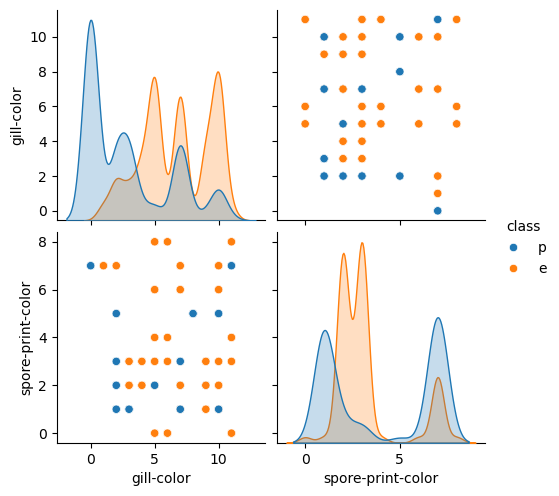

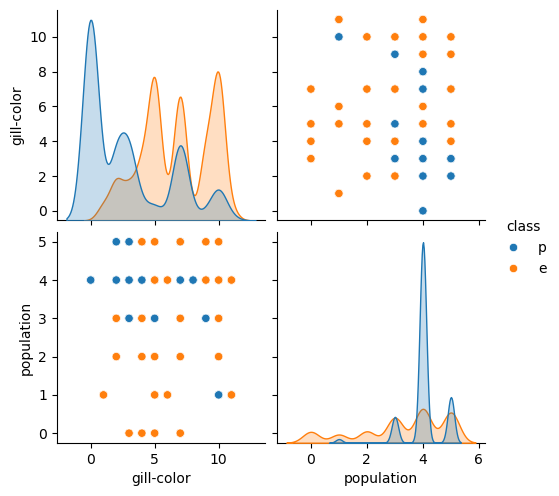

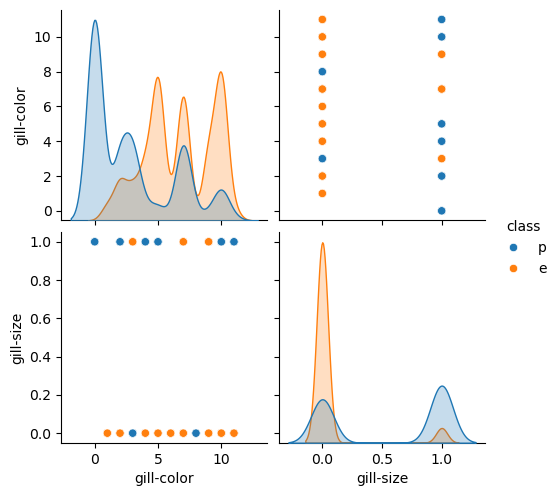

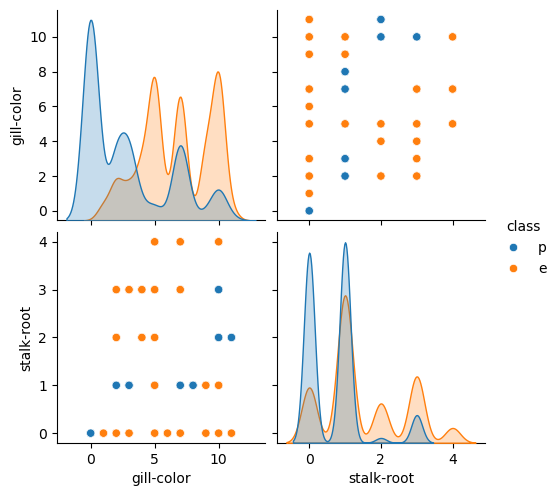

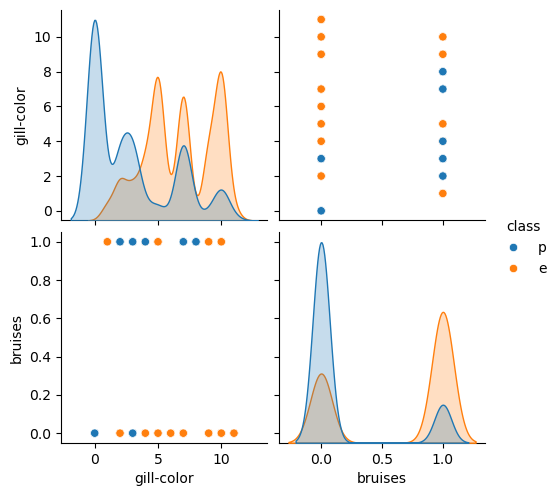

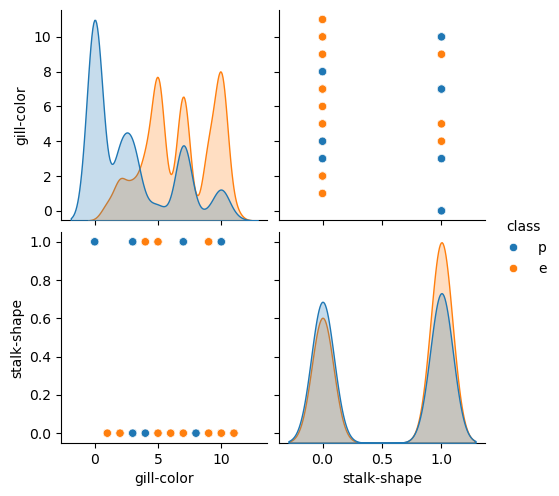

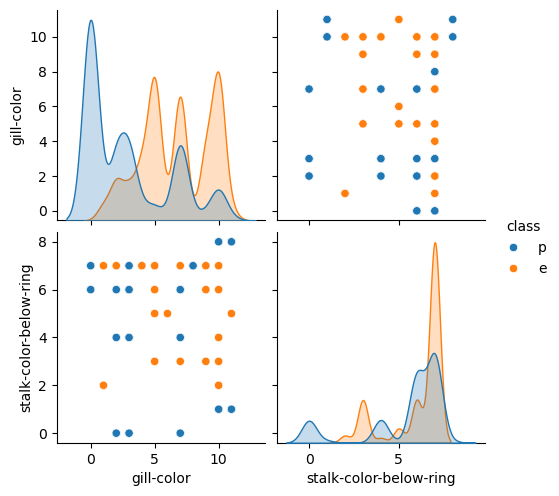

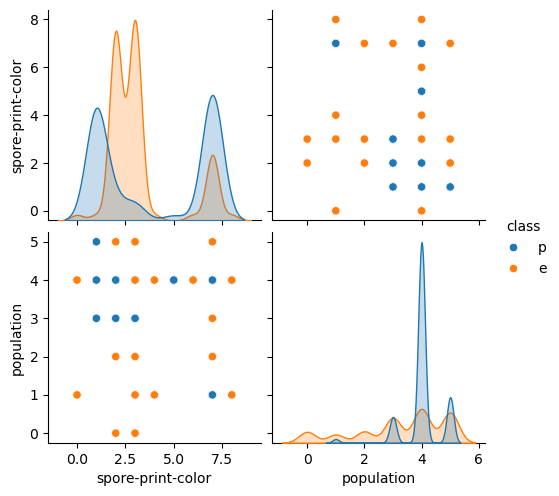

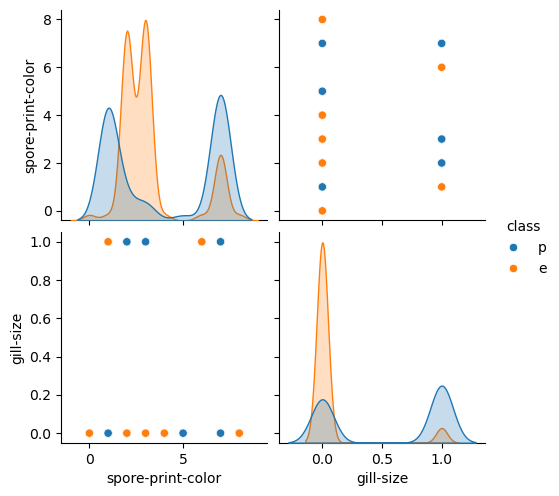

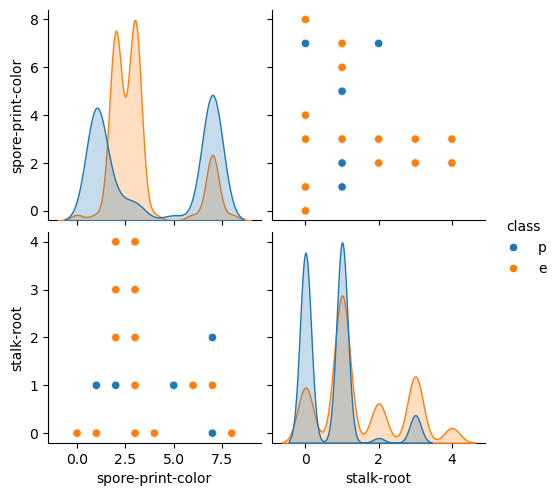

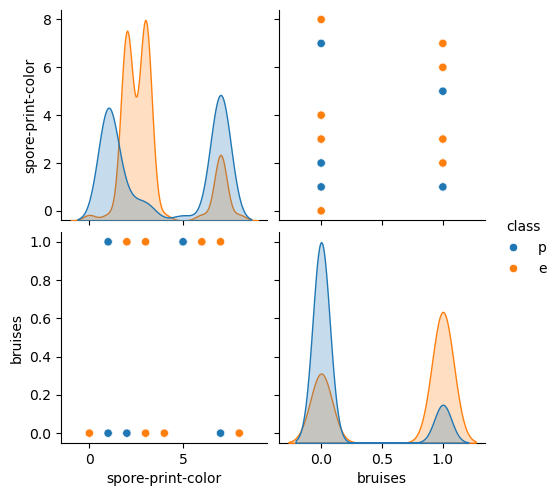

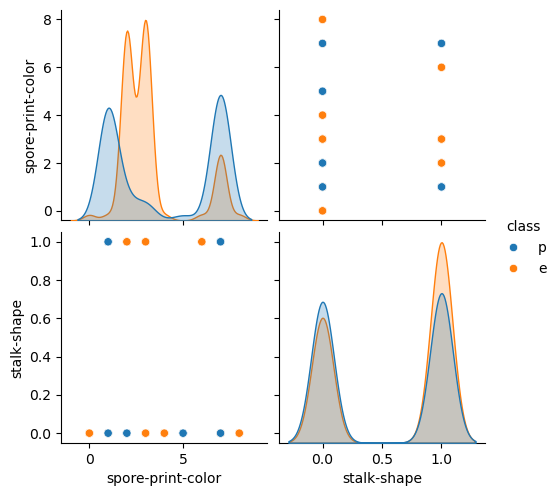

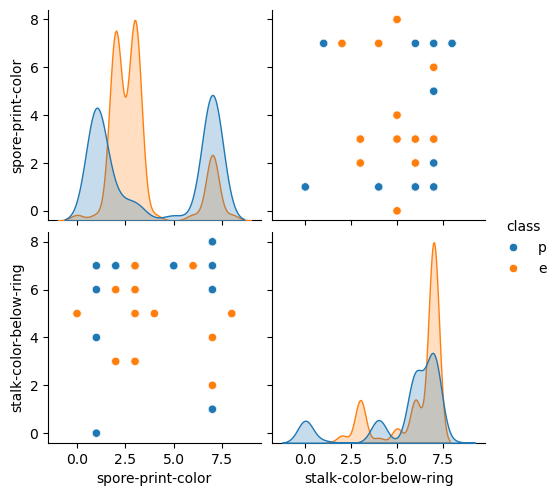

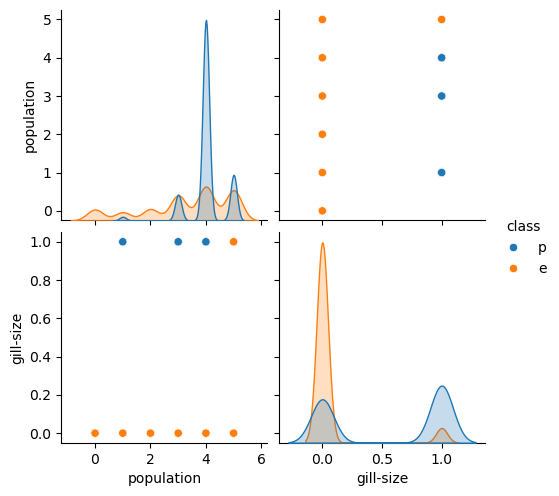

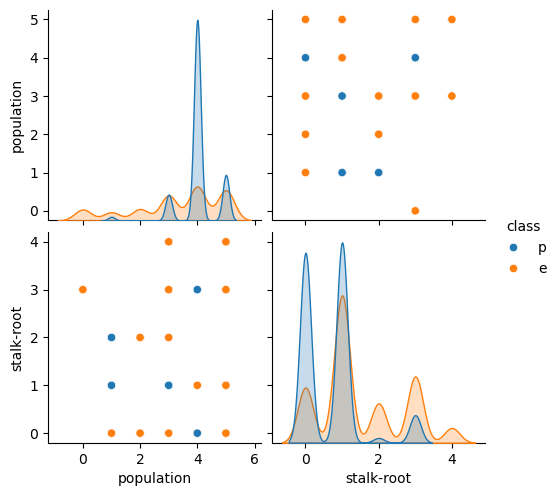

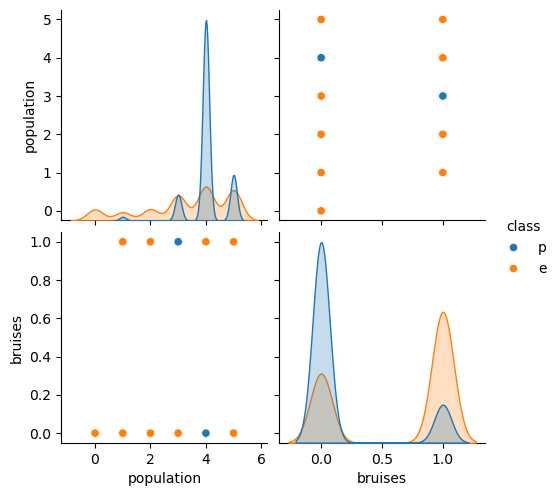

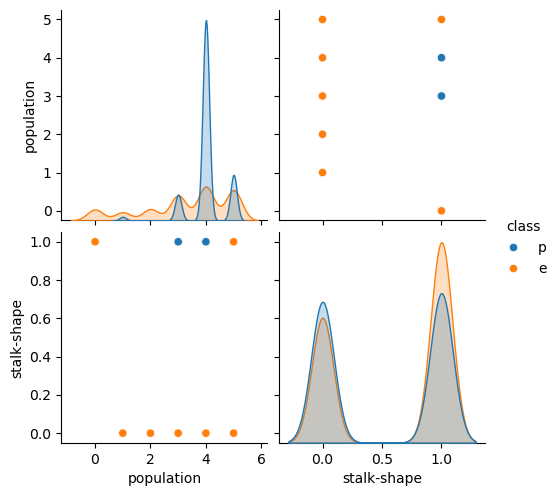

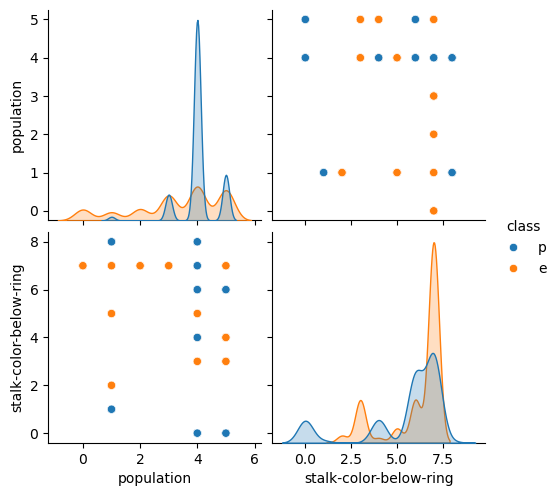

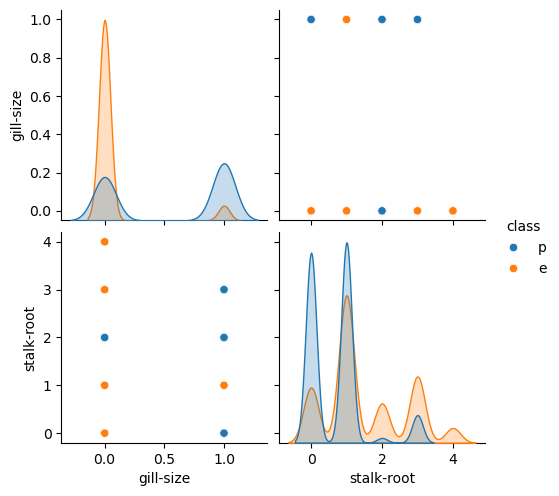

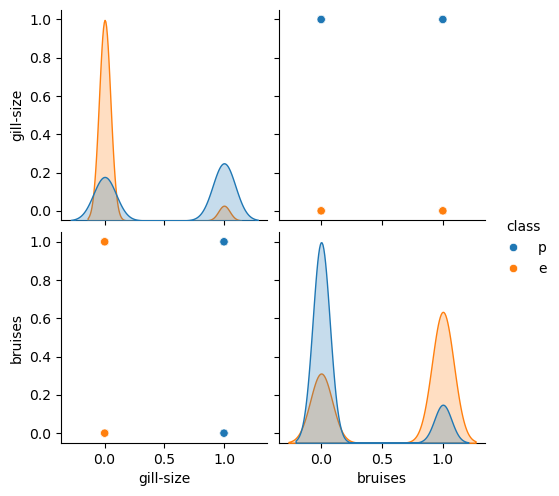

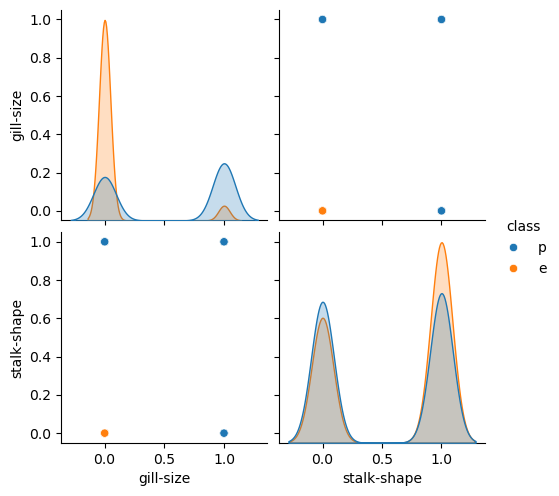

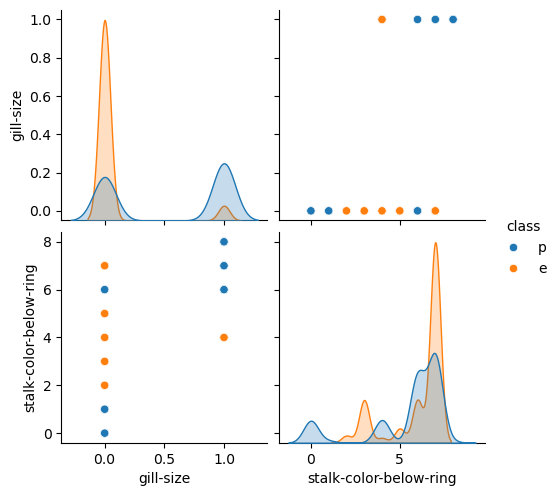

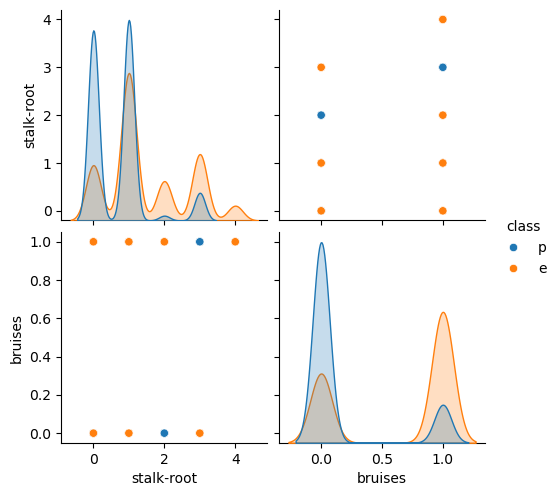

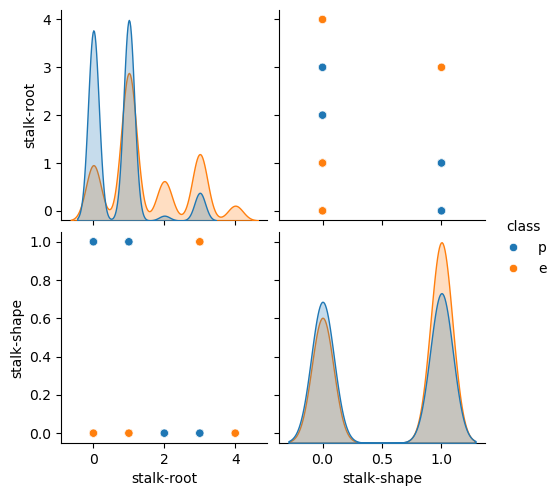

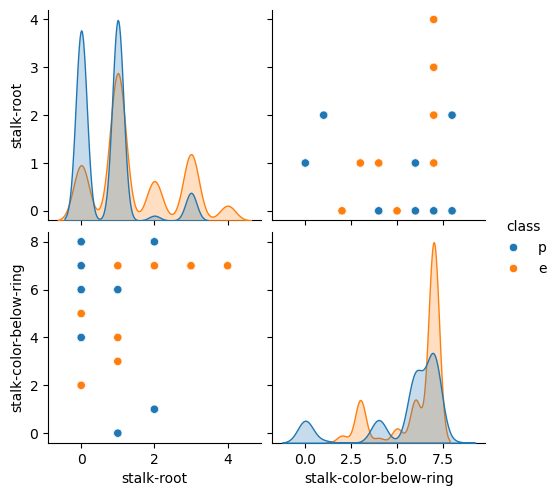

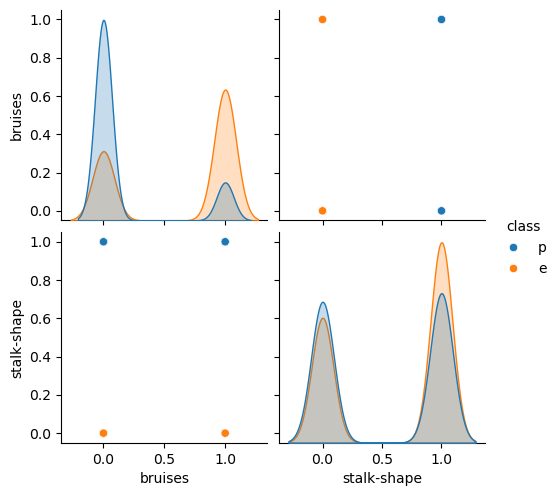

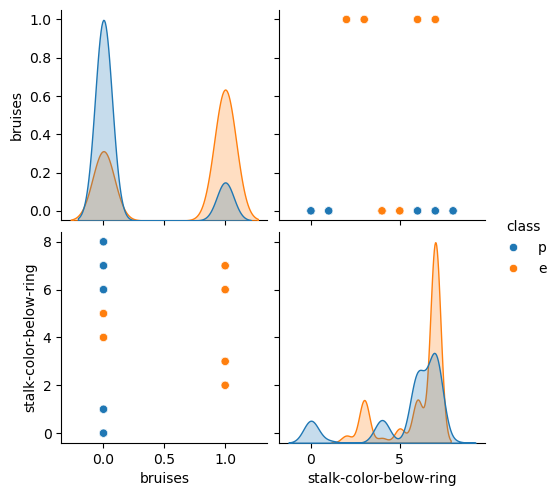

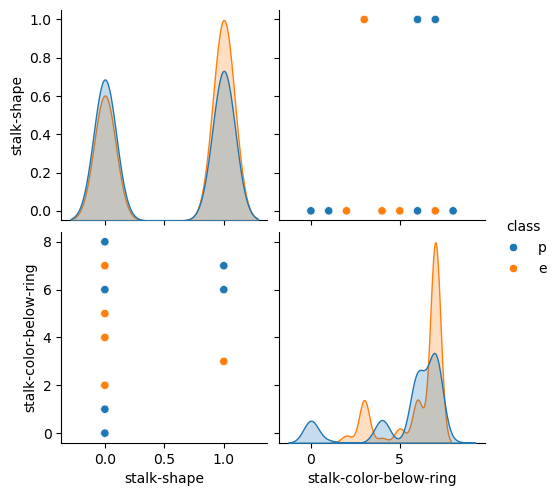

In [55]:
n = len(list_usefull_features)

df_for_plot = df
df_for_plot = df_for_plot.drop('class', axis=1)
df_for_plot_col = df_for_plot.columns.to_list()

label_encoder = OrdinalEncoder()
df_for_plot = label_encoder.fit_transform(df_for_plot)

standard_scaler = StandardScaler()
standard_scaler.fit(df_for_plot)
features = standard_scaler.transform(df_for_plot)

df_for_plot = pd.DataFrame(data=df_for_plot, columns=df_for_plot_col)
df_for_plot['class'] = df['class']

for index_1 in range(0, n-1):
    for index_2 in range(index_1+1, n):
        arg1 = list_usefull_features[index_1]
        arg2 = list_usefull_features[index_2]
        sns.pairplot(df_for_plot, vars=[arg1, arg2], hue='class')
        plt.show()

In [18]:
conclusion='''
Нарисовала графики всех наиболее важных параметров, на некоторых из них явно проглядывается конкретный класс в зависимости от самого параметра
На большинстве закономерность увидеть либо сложно, либо невозможно
'''

print(conclusion)


Нарисовала графики всех наиболее важных параметров, на некоторых из них явно проглядывается конкретный класс в зависимости от самого параметра
На большинстве закономерность увидеть либо сложно, либо невозможно



### 7. Вывод
- Сделайте вывод о:
   - проделанной работе
   - семинарах в целом
   - дисциплине
   - жизни

In [19]:
final_sem_conclusion='''
Новый заголовок для конклюжена, время 5.54 дата 04.11.2024, мой мозг пытается проявлять активность

1. Я считаю сдачу этих семинаров успешным, так как я многому научилась, создала кучу конспектов, перерерыла
кучу истоников, и многие действия делала интуитивно, очень хочу получить фидбэк, чтобы ещё сильнее улучшить свои знания, в целом мне очень понравилось,
больше всего понравилось заниматься аналитикой

2. Очень крутые семинары, Кирилл Владимрович, вы лучший, очень интересно и разнообразно, а главное можно отработать изученное, это очень круто, такого
количетсва практических навыков редко где можно получить

3. Очень крутая дисциплина, искренне надеюсь, что вы продолжите вести у нас практические занятия, буду стараться делать лабы с ещё большим энтузиазмом,
жду построения нейронок
'''

print(final_sem_conclusion)


Новый заголовок для конклюжена, время 5.54 дата 04.11.2024, мой мозг пытается проявлять активность

1. Я считаю сдачу этих семинаров успешным, так как я многому научилась, создала кучу конспектов, перерерыла
кучу истоников, и многие действия делала интуитивно, очень хочу получить фидбэк, чтобы ещё сильнее улучшить свои знания, в целом мне очень понравилось,
больше всего понравилось заниматься аналитикой

2. Очень крутые семинары, Кирилл Владимрович, вы лучший, очень интересно и разнообразно, а главное можно отработать изученное, это очень круто, такого
количетсва практических навыков редко где можно получить

3. Очень крутая дисциплина, искренне надеюсь, что вы продолжите вести у нас практические занятия, буду стараться делать лабы с ещё большим энтузиазмом,
жду построения нейронок

